# WINE QUALITY PREDICTION

## 1. INTRODUCTION
The quality of wine is an important factor that influences consumer satisfaction, market value, and brand reputation in the food and beverage industry. Traditionally, wine quality evaluation is performed by human experts through sensory analysis, which can be subjective, time-consuming, and inconsistent. With the increasing availability of data and advancements in data science, machine learning techniques provide an effective way to analyze wine characteristics and predict quality in a more objective and efficient manner.

This project focuses on predicting wine quality using machine learning models based on physicochemical properties such as alcohol content, acidity, pH level, and residual sugar. By analyzing historical wine data, the model learns the relationship between these chemical attributes and the quality ratings assigned by experts. The trained model can then predict the quality of new wine samples with reasonable accuracy.

The project follows a systematic machine learning pipeline that includes data cleaning, exploratory data analysis, feature analysis, data preprocessing, model training, and performance evaluation. This approach ensures that the model is not only accurate but also interpretable and reliable. The results of this project demonstrate how data-driven methods can assist in quality assessment and decision-making in the wine production process.

Overall, this project highlights the practical application of machine learning in real-world quality prediction problems and demonstrates how predictive models can support traditional evaluation methods in an efficient and scalable manner.

## Objective of the Project
The main objective of this project is to develop a machine learning–based model that can predict the quality of wine using its physicochemical properties. The project aims to analyze how factors such as alcohol content, acidity, pH level, residual sugar, and other chemical attributes influence the overall quality rating of wine.

In addition to prediction, the project focuses on understanding the dataset through exploratory data analysis, identifying important features that affect wine quality, and evaluating the performance of different regression models. By following a structured machine learning pipeline, the project demonstrates the practical application of data preprocessing, model training, and evaluation techniques.

Overall, the objective is to build an accurate, reliable, and interpretable model that can assist in automated wine quality assessment and support data-driven decision-making in the wine production and quality control process.

## Problem Description
Wine quality assessment is traditionally performed by human experts through sensory evaluation, which involves taste, aroma, and visual inspection. Although this method is widely used, it is subjective, time-consuming, and may vary depending on individual judgment and experience. As the wine industry grows, there is a need for a more objective, consistent, and scalable approach to evaluate wine quality.

The problem addressed in this project is to predict the quality of wine based on measurable physicochemical properties available in historical data. Given a dataset containing various chemical attributes of wine samples along with their quality ratings, the task is to train a machine learning model that can learn the relationship between these attributes and the quality score.

The challenge lies in preprocessing the data, handling outliers, selecting relevant features, and choosing appropriate models that provide accurate predictions. By solving this problem, the project demonstrates how machine learning techniques can be used to reduce human bias, improve consistency, and enhance efficiency in wine quality evaluation.

## 2. Dataset Description

In [41]:
import pandas as pd
import numpy as np

In [42]:
data=pd.read_csv("WineQT.csv")

In [43]:
data.shape

(1143, 13)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [45]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


The input features include variables such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, sulfur dioxide levels, density, pH, sulphates, and alcohol. The target variable is quality, which represents the sensory quality score of the wine on a numerical scale. This quality score is used as the output for prediction.

Initial inspection of the dataset shows that it contains no significant missing values and is relatively clean. However, exploratory analysis is required to further understand feature distributions, detect outliers, and identify relationships between variables before model training.

## 3. Data Cleaning

### 3.1 Missing Value Handling

In [46]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

The dataset was checked for missing values to ensure data completeness. Each feature was examined to identify null or empty entries. After inspection, the dataset was found to contain no significant missing values, and therefore no imputation or removal was required. This indicates that the dataset is well-prepared for analysis and model training.

### 3.2 Duplicate Data Handling

In [47]:
dup_count = data.duplicated().sum()
print(f"Duplicate rows: {dup_count}")

if dup_count > 0:
    data = data.drop_duplicates().reset_index(drop=True) #resets index after dropping duplicates
    print("Duplicates dropped.")
else:
    print("No duplicates to drop.")

data=data.drop(columns=['Id'])

Duplicate rows: 0
No duplicates to drop.


Duplicate records can introduce redundancy and bias into the dataset, leading to misleading patterns during model training. Duplicate entries, if present, were removed to ensure that each wine sample is represented only once in the dataset. This step helps maintain the integrity and uniqueness of the data. the 'Id' column was dropped because they add noise.

### 3.3 Data Consistency Check

In [48]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All feature were int64 or float64 which means the quality of the data is numeric. it indicates consistency in data types.

In [49]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [50]:
data['quality'].unique()    

array([5, 6, 7, 4, 8, 3])

In [51]:
quality_counts=data['quality'].value_counts()
quality_counts

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

The target variable was examined using the unique() function to verify that it contains only valid quality scores within the expected range. This confirms the consistency and correctness of the target data.

The data shape after cleaning is shown below.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


## 4. Exploratory Data Analysis


### 4.1 Target Variable Analysis (Wine Quality)


In [53]:
most_common = quality_counts.idxmax()
most_common_count = quality_counts.max()

min_count = quality_counts.min()
rare_classes = quality_counts[quality_counts == min_count].index.tolist()

print(f"\nMost common quality: {most_common} (n={most_common_count})")
print(f"Rare quality classes: {rare_classes} (n={min_count} each)")


Most common quality: 5 (n=483)
Rare quality classes: [3] (n=6 each)


Quality is an ordinal target because it represents ordered rating levels where higher numbers indicate better wine quality.



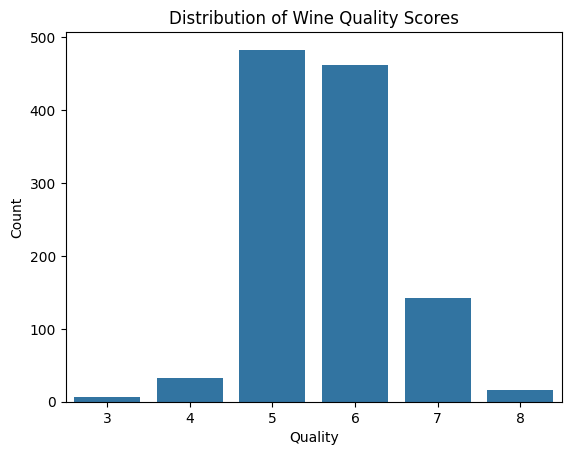

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns   

plt.figure()
sns.countplot(x='quality', data=data)
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

### 4.2 Univariate Feature Analysis

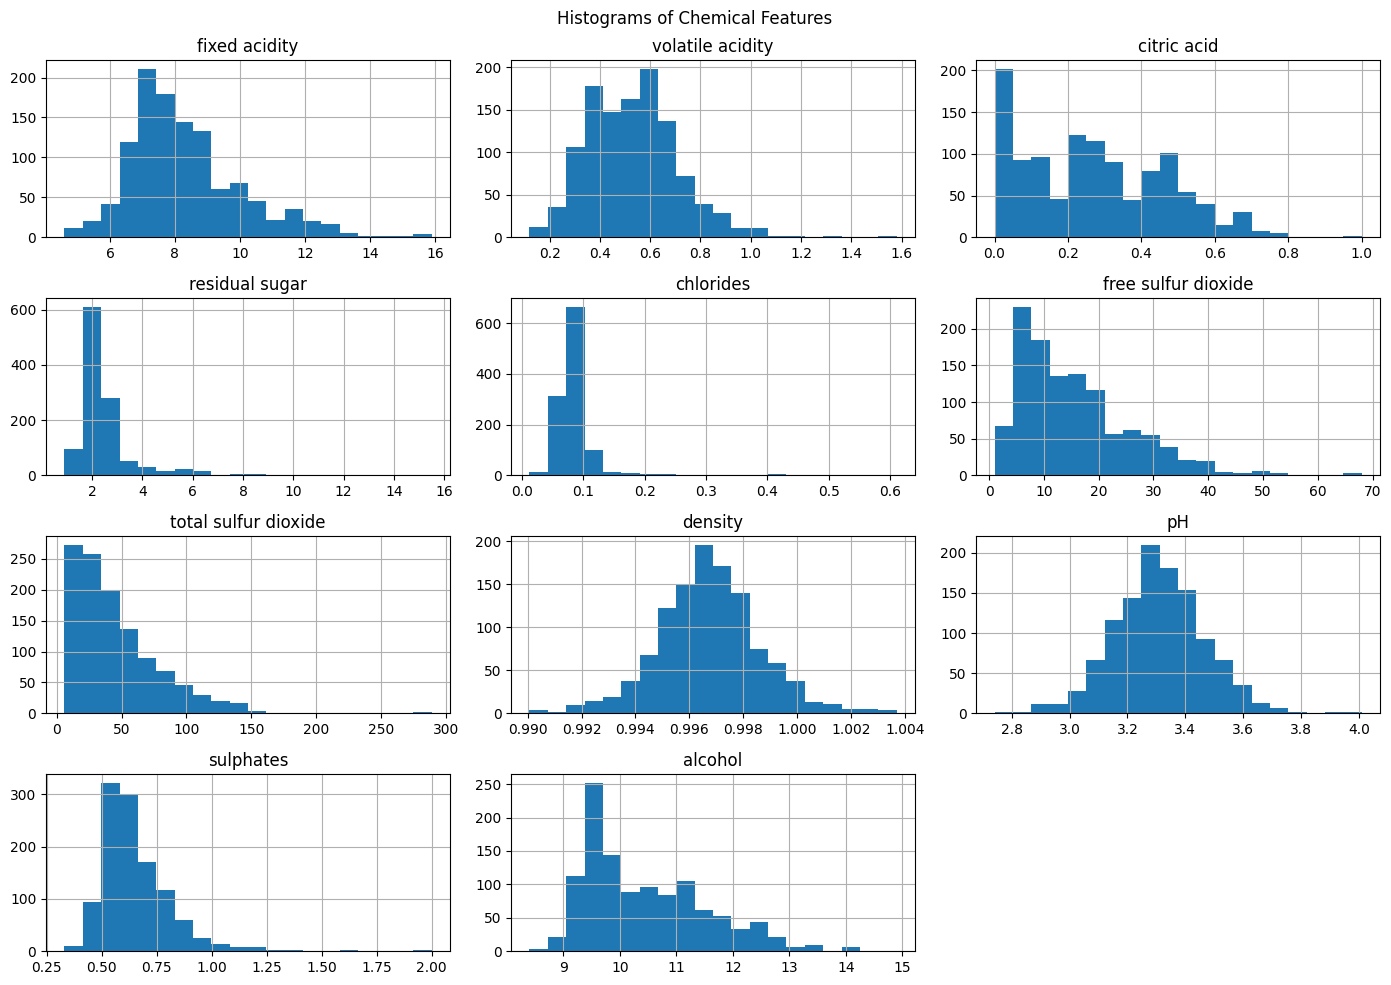

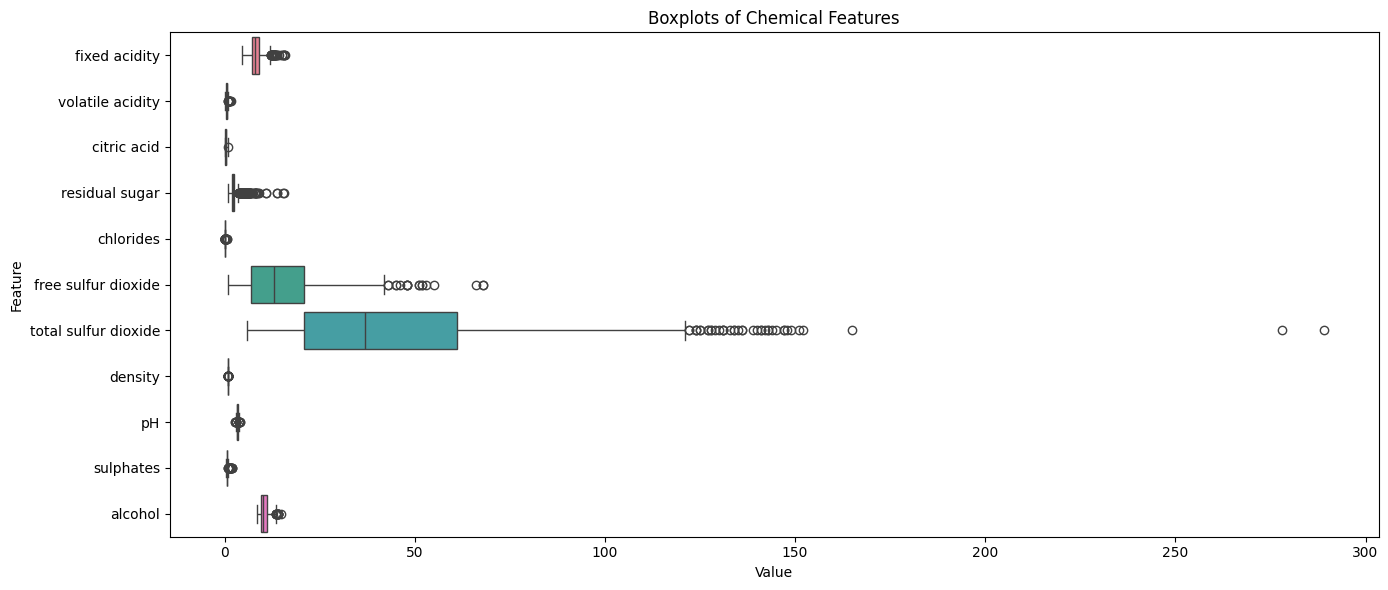

In [55]:
features = data.drop(columns=["quality"], errors="ignore").columns

# Histograms
data[features].hist(bins=20, figsize=(14, 10))
plt.suptitle("Histograms of Chemical Features")
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(14, 6))
sns.boxplot(data=data[features], orient="h")
plt.title("Boxplots of Chemical Features")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

This block performs univariate analysis of the chemical features by first plotting histograms to show the distribution of each variable, then using boxplots to summarize central tendency and highlight outliers. Together, these visuals help identify skewness, spread, and potential anomalies across the features before modeling.

### 4.3 Feature–Target Relationship Analysis

#### ● Alcohol vs. Quality

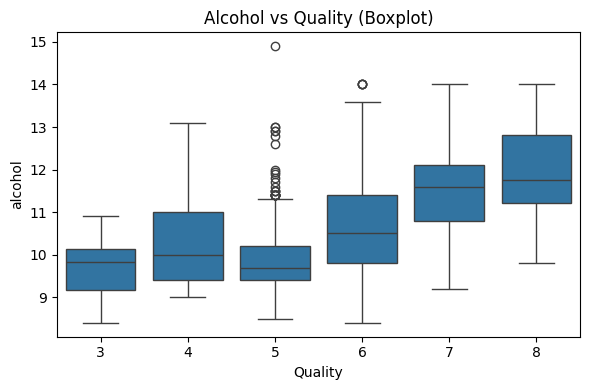

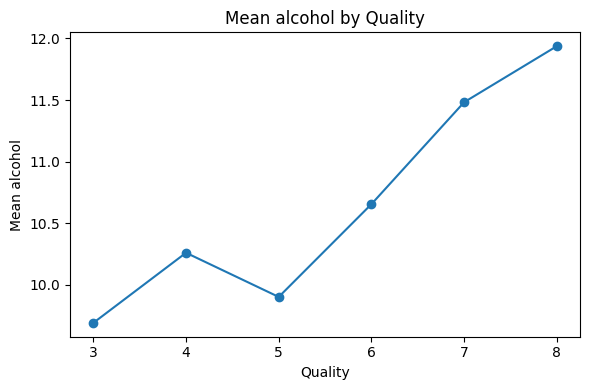

In [56]:
plt.figure(figsize=(6,4))
sns.boxplot(x="quality", y="alcohol", data=data)
plt.title("Alcohol vs Quality (Boxplot)")
plt.xlabel("Quality")
plt.ylabel("alcohol")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
data.groupby("quality")["alcohol"].mean().plot(kind="line", marker="o")
plt.title("Mean alcohol by Quality")
plt.xlabel("Quality")
plt.ylabel("Mean alcohol")
plt.tight_layout()
plt.show()

Alcohol vs Quality: The boxplot shows alcohol tends to be higher for higher quality scores, and the mean line highlights an overall upward trend.


#### ● Volatile Acidity vs. Quality

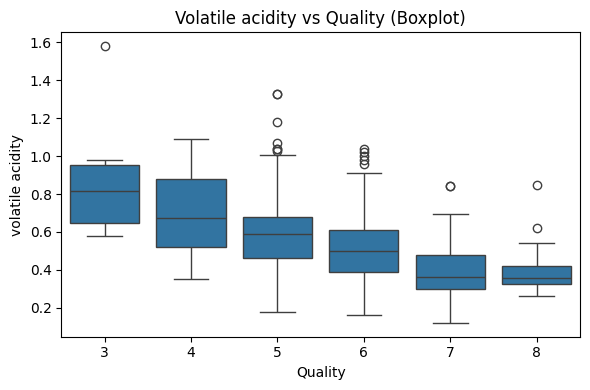

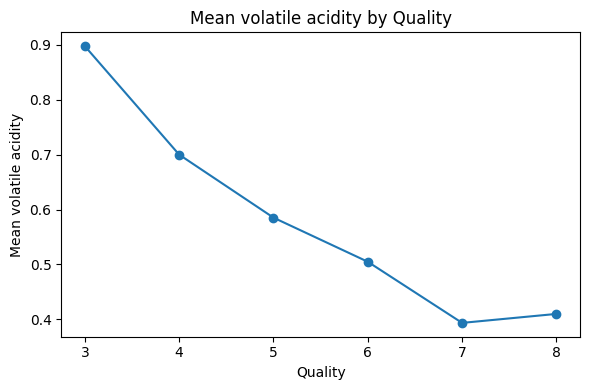

In [57]:
plt.figure(figsize=(6,4))
sns.boxplot(x="quality", y="volatile acidity", data=data)
plt.title("Volatile acidity vs Quality (Boxplot)")
plt.xlabel("Quality")
plt.ylabel("volatile acidity")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
data.groupby("quality")["volatile acidity"].mean().plot(kind="line", marker="o")
plt.title("Mean volatile acidity by Quality")
plt.xlabel("Quality")
plt.ylabel("Mean volatile acidity")
plt.tight_layout()
plt.show()

Volatile acidity vs Quality: Higher quality wines generally show lower volatile acidity, with the mean line indicating a downward trend as quality increases.


#### ● Sulphates vs. Quality

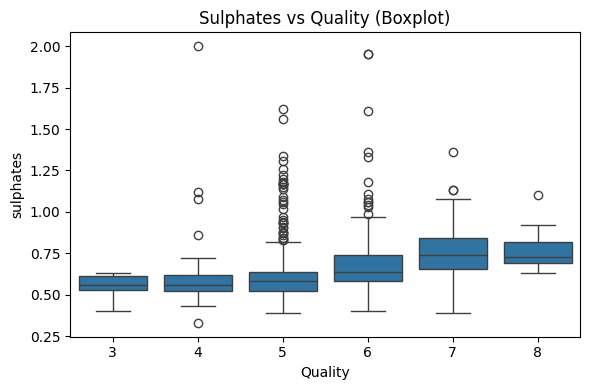

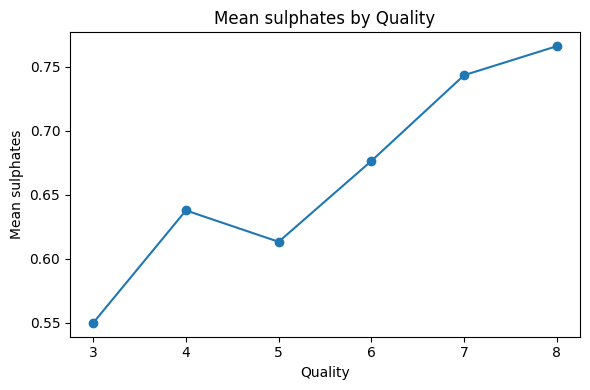

In [58]:
plt.figure(figsize=(6,4))
sns.boxplot(x="quality", y="sulphates", data=data)
plt.title("Sulphates vs Quality (Boxplot)")
plt.xlabel("Quality")
plt.ylabel("sulphates")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
data.groupby("quality")["sulphates"].mean().plot(kind="line", marker="o")
plt.title("Mean sulphates by Quality")
plt.xlabel("Quality")
plt.ylabel("Mean sulphates")
plt.tight_layout()
plt.show()

Sulphates vs Quality: Sulphate levels show a mild positive association with quality, with higher quality scores having slightly higher medians and means.


#### ● Citric Acid vs. Quality

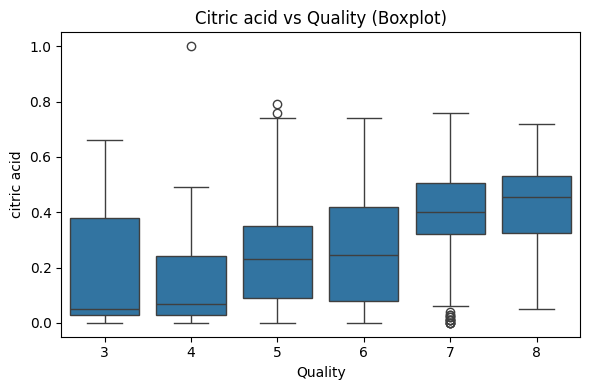

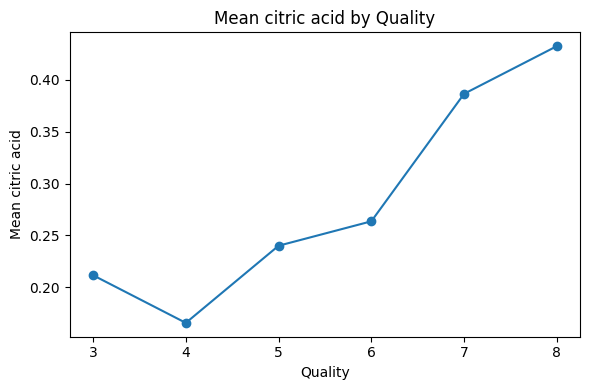

In [59]:
plt.figure(figsize=(6,4))
sns.boxplot(x="quality", y="citric acid", data=data)
plt.title("Citric acid vs Quality (Boxplot)")
plt.xlabel("Quality")
plt.ylabel("citric acid")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
data.groupby("quality")["citric acid"].mean().plot(kind="line", marker="o")
plt.title("Mean citric acid by Quality")
plt.xlabel("Quality")
plt.ylabel("Mean citric acid")
plt.tight_layout()
plt.show()


Citric acid vs Quality: Citric acid tends to increase with quality, though the relationship is moderate and shows overlap across classes.


#### ● pH vs. Quality

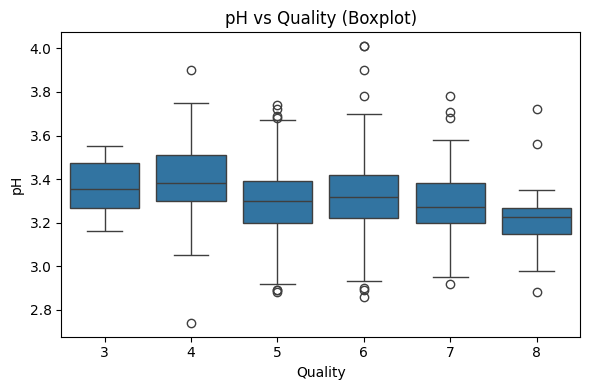

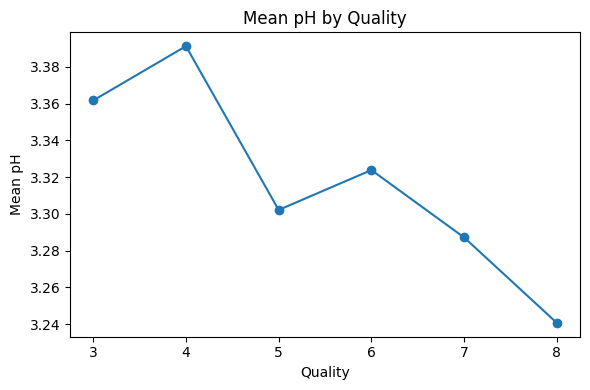

In [60]:
plt.figure(figsize=(6,4))
sns.boxplot(x="quality", y="pH", data=data)
plt.title("pH vs Quality (Boxplot)")
plt.xlabel("Quality")
plt.ylabel("pH")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
data.groupby("quality")["pH"].mean().plot(kind="line", marker="o")
plt.title("Mean pH by Quality")
plt.xlabel("Quality")
plt.ylabel("Mean pH")
plt.tight_layout()
plt.show()

pH vs Quality: pH shows a weak relationship with quality; medians and means vary slightly with no strong monotonic trend.
